In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install gensim==3.6.0

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_path = '/content/drive/MyDrive/Colab Notebooks/data/'

In [5]:
df = pd.read_csv(data_path + 'french_tweets.csv').sample(10000).reset_index(drop=True)
df.head()

,label,text
0,1,Merci mec. Je me suis impressionné un peu
1,0,Nous en avons un dans cette petite ville à pro...
2,0,je ne suis pas loin. L'école d'été ne me lâche...
3,1,Bonjour câlins
4,1,Hey tiffany !! content de te voir!


In [6]:
X = df["text"]
y = df["label"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [10]:
import gensim.downloader as api
print(list(api.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [11]:
word2vec_transfer = api.load('glove-twitter-100')

In [13]:
len(word2vec_transfer.vocab)

1193514

In [14]:
word2vec_transfer.vector_size

100

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Function to convert a sentence (list of words) into a matrix representing the words in the embedding space
def embed_sentence_with_TF(word2vec, sentence):
    embedded_sentence = []
    for word in sentence:
        if word in word2vec:
            embedded_sentence.append(word2vec[word])
        
    return np.array(embedded_sentence)

# Function that converts a list of sentences into a list of matrices
def embedding(word2vec, sentences):
    embed = []
    
    for sentence in sentences:
        embedded_sentence = embed_sentence_with_TF(word2vec, sentence)
        embed.append(embedded_sentence)
        
    return embed

# Embed the training and test sentences
X_train_embed_2 = embedding(word2vec_transfer, X_train)
X_test_embed_2 = embedding(word2vec_transfer, X_test)

In [16]:
X_train_pad_2 = pad_sequences(X_train_embed_2, dtype='float32', padding='post', maxlen=200)
X_test_pad_2 = pad_sequences(X_test_embed_2, dtype='float32', padding='post', maxlen=200)

In [18]:
def init_model():
    model = Sequential()
    model.add(layers.Masking())
    model.add(layers.LSTM(20, activation='tanh'))
    model.add(layers.Dense(15, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    
    return model

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, restore_best_weights=True)

from tensorflow.keras import Sequential
from tensorflow.keras import layers

model = init_model()

model.fit(X_train_pad_2, y_train, 
          batch_size = 32,
          epochs=30,
          validation_split=0.3,
          callbacks=[es]
         )

Epoch 1/30
147/147 [==============================] - 19s 99ms/step - loss: 0.6883 - accuracy: 0.5392 - val_loss: 0.6880 - val_accuracy: 0.5418
Epoch 2/30
147/147 [==============================] - 14s 93ms/step - loss: 0.6811 - accuracy: 0.5695 - val_loss: 0.6845 - val_accuracy: 0.5532
Epoch 3/30
147/147 [==============================] - 14s 93ms/step - loss: 0.6752 - accuracy: 0.5872 - val_loss: 0.6904 - val_accuracy: 0.5408
Epoch 4/30
147/147 [==============================] - 14s 93ms/step - loss: 0.6717 - accuracy: 0.5864 - val_loss: 0.6843 - val_accuracy: 0.5652
Epoch 5/30
147/147 [==============================] - 14s 93ms/step - loss: 0.6672 - accuracy: 0.6002 - val_loss: 0.6802 - val_accuracy: 0.5672
Epoch 6/30
147/147 [==============================] - 14s 93ms/step - loss: 0.6616 - accuracy: 0.6115 - val_loss: 0.6802 - val_accuracy: 0.5766
Epoch 7/30
147/147 [==============================] - 14s 94ms/step - loss: 0.6590 - accuracy: 0.6143 - val_loss: 0.6790 - val_accuracy:

In [22]:
train_twits = np.array(X_train)

In [23]:
test_twits = np.array(X_test)

In [24]:
MAX_NB_WORDS = 20000

tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=MAX_NB_WORDS,
    oov_token="<unk>",
)
tokenizer.fit_on_texts(train_twits)

word_index = tokenizer.word_index
print("Found {} unique tokens.".format(len(word_index)))

Found 11695 unique tokens.


In [25]:
train_twits_tokenized = tokenizer.texts_to_sequences(train_twits)
test_twits_tokenized = tokenizer.texts_to_sequences(test_twits)

In [26]:
some_twit = train_twits_tokenized[0]
some_twit[:15]

[644, 11, 4575, 7, 558, 217, 272, 163, 37, 9, 343, 10, 127, 770, 1324]

In [27]:
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())
" ".join([index_to_word[i] for i in some_twit[:15]])

'chanceux ne célébrez pas nos 5 mois sans moi et mec vous êtes absolument invité'

Average length: 13.8
Max length: 44


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


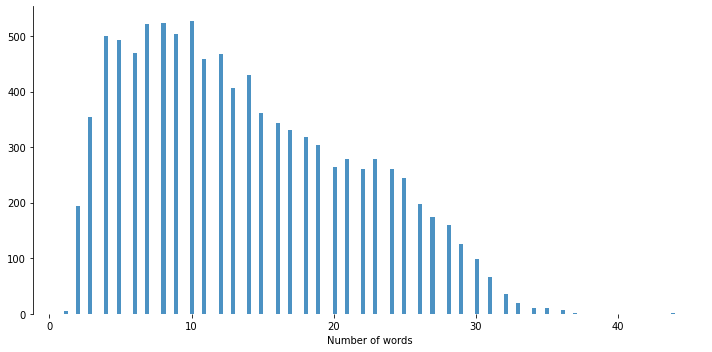

In [28]:
twit_len = [len(s) for s in train_twits_tokenized+test_twits_tokenized]
print("Average length: {:.1f}".format(np.mean(twit_len)))
print("Max length: {}".format(max(twit_len)))

plt.figure(figsize=(10,5))
ax = sns.distplot(twit_len, bins=150, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Number of words')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LENGTH_SEQ = 44

X_train = pad_sequences(
    train_twits_tokenized, 
    maxlen=MAX_LENGTH_SEQ,
    padding='post'
)


X_test = pad_sequences(
    test_twits_tokenized, 
    maxlen=MAX_LENGTH_SEQ,
    padding='post'
)

print('Shape of X_train tensor:', X_train.shape)
print('Shape of X_test tensor:', X_test.shape)

Shape of X_train tensor: (6700, 44)
Shape of X_test tensor: (3300, 44)


In [31]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

class SequencePreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, max_nbr_words, max_seq_length):
        self.tokenizer = tf.keras.preprocessing.text.Tokenizer(
            num_words=max_nbr_words,
            oov_token="<unk>",
        )
        self.max_seq_length = max_seq_length

    # the arguments are ignored anyway, so we make them optional
    def fit(self, X):
        self.tokenizer.fit_on_texts(X)

    def transform(self, X, y):
        # 1. Tokenize
        X_tokenized = self.tokenizer.texts_to_sequences(X)
        # 2. Remove empty sequences
        X_not_empty, y_not_empty = remove_empty_sequences(X_tokenized, y)
        # 3. Pad
        X_padded = tf.keras.preprocessing.sequence.pad_sequences(
            X_not_empty, 
            maxlen=self.max_seq_length,
            padding='post'
        )
        # 4. labels
        y_array = np.array(y_not_empty)
        return X_padded, y_array     
    
    def fit_transform(self, X, y):
        self.fit(X)
        return self.transform(X, y)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

# Hyperparameters
embedding_dim = 128
hidden_dim = 256

model = Sequential(name='rnn')
model.add(Embedding(MAX_NB_WORDS, embedding_dim,
                    mask_zero=True, input_shape=[None]))

model.add(GRU(hidden_dim, return_sequences=True))
model.add(GRU(hidden_dim))
model.add(Dense(1, activation="sigmoid"))

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [34]:
initial_weights = model.get_weights()
model.summary()

Model: "rnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
gru (GRU)                    (None, None, 256)         296448    
_________________________________________________________________
gru_1 (GRU)                  (None, 256)               394752    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 3,251,457
Trainable params: 3,251,457
Non-trainable params: 0
_________________________________________________________________


In [35]:
es = EarlyStopping(patience=5, restore_best_weights=True)

In [36]:
history = model.fit(
    X_train, y_train,
    validation_split=0.3,
    epochs=5, 
    batch_size=64, 
    callbacks=[es], 
    verbose=1)

Epoch 1/5
74/74 [==============================] - 35s 398ms/step - loss: 0.6403 - accuracy: 0.6394 - val_loss: 0.5867 - val_accuracy: 0.6910
Epoch 2/5
74/74 [==============================] - 27s 371ms/step - loss: 0.3638 - accuracy: 0.8448 - val_loss: 0.6698 - val_accuracy: 0.7005
Epoch 3/5
74/74 [==============================] - 28s 372ms/step - loss: 0.1516 - accuracy: 0.9452 - val_loss: 0.9216 - val_accuracy: 0.6866
Epoch 4/5
74/74 [==============================] - 27s 371ms/step - loss: 0.0644 - accuracy: 0.9785 - val_loss: 1.3228 - val_accuracy: 0.6861
Epoch 5/5
74/74 [==============================] - 28s 373ms/step - loss: 0.0513 - accuracy: 0.9834 - val_loss: 1.6472 - val_accuracy: 0.6881


In [37]:
def plot_training_curves(history, figsize=(12, 5)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Val'], loc='upper left')

    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Val'], loc='upper left')

    return fig

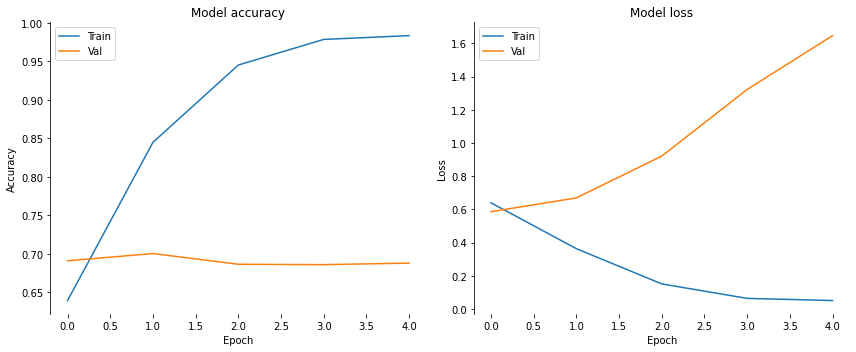

In [38]:
fig = plot_training_curves(history)

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

In [39]:
from sklearn import metrics

probas = model.predict(X_test)
y_pred = (probas > 0.5).astype(np.int)

In [40]:
print("Test Accuracy: {:.2f}".format(100 * metrics.accuracy_score(y_test, y_pred)))
print("Test F1-Score: {:.2f}".format(100 * metrics.f1_score(y_test, y_pred)))

Test Accuracy: 67.70
Test F1-Score: 66.79
